In [ ]:
# Jairo Andres Saavedra Alfonso
# 01 de Febrero de 2019
# Universidad de Los Andes
# Phycis 
######################__________________Report 01__________________######################

In [1]:
#Packages
from astropy.io import fits
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from astropy.table import Table


In [2]:
# Reading data from truth_DR12Q.fits. This file have the database sample of spectra with human-expert classifitacion

hdul = fits.open('truth_DR12Q.fits') # Open file
info=hdul.info() # File info
columns=hdul[1].columns # File Columns 
print(info,'/n',columns)
data=hdul[1].data # Database of spectra with human-expert classifications 

# Reading data from data_dr12.fits. This file had the spectra from data dr12. 
hdul_2 = fits.open('data_dr12.fits') # Open file
info=hdul_2.info() # File info 
columns=hdul_2[1].columns # File Columns 
print(hdul,'/n',columns)
data2=hdul_2[1].data # Database of spectra
spectra=hdul_2[0].data # Spectrum of each object 
"""

# The Spectra in this database have three main parameters: Plate ID, The modified julian day and fiber ID of the observation.
# Let's take a look of the first spectrum.
x=np.linspace(360,1000,443) # I cut the sample to 443 pixels in spaced log-wavelength.  
#x=np.linspace(0,886,886)
zero_spectrum=spectra[12030] #First spectrum
zero_spectrum=zero_spectrum[:443]

PLATE=data2['PLATE'] # Spectra's Plate ID
MJD=data2['MJD'] # Spectra's the modified juliam day
FIBERID=data2['FIBERID'] # Spectra's fiber ID

zero_plate=PLATE[0] # zero spectrum Plate ID
zero_mjd=MJD[0] # zero spectrum MJD
zero_fiberid=FIBERID[0] # zero spectrum Fiber ID
param = 'Plate = {:.2f}, mjd = {:.2f}, fiberid={:.2f}'.format(zero_plate, zero_mjd, zero_fiberid)
plt.plot(x,np.log(zero_spectrum))
plt.xlabel('Wavelength [nm]')
plt.ylabel('Log-Flux [arb. units]')
plt.title(param)
plt.xlim([360,1000])
plt.savefig('spectrum.png')
plt.grid()

# I noticed that each object and spectrum don't have the same label. So it's imposible to make some ID correlations.  
print(data2['TARGETID'])
print(data['THING_ID'])
da=np.intersect1d(data2['TARGETID'],data['THING_ID'])
print(da.shape)

# So, in orden to make a correlation betwen identified object and spectrum we need to use all three parameters (Plate ID, MJD, FiberID)
"""

Filename: truth_DR12Q.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     27   546856R x 9C   [J, D, J, J, J, J, J, D, D]   
None /n ColDefs(
    name = 'THING_ID'; format = 'J'
    name = 'Z_VI'; format = 'D'
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
    name = 'CLASS_PERSON'; format = 'J'
    name = 'Z_CONF_PERSON'; format = 'J'
    name = 'BAL_FLAG_VI'; format = 'D'
    name = 'BI_CIV'; format = 'D'
)
Filename: data_dr12.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (886, 639464)   float64   
  1                1 BinTableHDU     16   639464R x 4C   [J, J, J, J]   
[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f25dffea5f8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f25dffeab70>] /n ColDefs(
    name = 'TARGETID'; format = 'J'
    name = 'PLATE'; for

"\n\n# The Spectra in this database have three main parameters: Plate ID, The modified julian day and fiber ID of the observation.\n# Let's take a look of the first spectrum.\nx=np.linspace(360,1000,443) # I cut the sample to 443 pixels in spaced log-wavelength.  \n#x=np.linspace(0,886,886)\nzero_spectrum=spectra[12030] #First spectrum\nzero_spectrum=zero_spectrum[:443]\n\nPLATE=data2['PLATE'] # Spectra's Plate ID\nMJD=data2['MJD'] # Spectra's the modified juliam day\nFIBERID=data2['FIBERID'] # Spectra's fiber ID\n\nzero_plate=PLATE[0] # zero spectrum Plate ID\nzero_mjd=MJD[0] # zero spectrum MJD\nzero_fiberid=FIBERID[0] # zero spectrum Fiber ID\nparam = 'Plate = {:.2f}, mjd = {:.2f}, fiberid={:.2f}'.format(zero_plate, zero_mjd, zero_fiberid)\nplt.plot(x,np.log(zero_spectrum))\nplt.xlabel('Wavelength [nm]')\nplt.ylabel('Log-Flux [arb. units]')\nplt.title(param)\nplt.xlim([360,1000])\nplt.savefig('spectrum.png')\nplt.grid()\n\n# I noticed that each object and spectrum don't have the sam

In [3]:
######################__________________Report 02__________________######################

## This week I pretend to find some correaltions betwen objects with human-expert classification and spretum from DR12

# Subset of PLATE parameters of both data
data_PLATE_1=data['PLATE']
data_PLATE_2=data2['PLATE']

# Subset of MJD parameters of both data
data_MJD_1=data['MJD']
data_MJD_2=data2['MJD']

# Subset of FIBERID parameters of both data
data_FIBERID_1=data['FIBERID']
data_FIBERID_2=data2['FIBERID']

# Subset of FIBERID parameters of both data
data_ID_1=data['THING_ID']
data_ID_2=data2['TARGETID']

# I make here an intersecting set for all three parameters (PLATE, MJD, FIBERID) in both data.
data_PLATE_CO=np.intersect1d(data_PLATE_1,data_PLATE_2)
data_MJD_CO=np.intersect1d(data_MJD_1,data_MJD_2)
data_FIBERID_CO=np.intersect1d(data_FIBERID_1,data_FIBERID_2)
data_ID_CO=np.intersect1d(data_ID_1,data_ID_2)

# As we can see, in both database, there is a correlation betwen the number of Plates, the modified julian day and the Fiber ID. 
print('Number of Plates use in both datasets:',data_PLATE_CO.shape)
print('Number of MJD use in both datasets:',data_MJD_CO.shape)
print('Number of FIBERID use in both datasets:',data_FIBERID_CO.shape)
#print('Number of FIBERID use in both datasets:',data_ID_CO.shape)
#print(data_PLATE_1.dtype)

# I create two DataFrame for Superset_DR12Q and data_dr12 with only three parameters
data1={'PLATE':data_PLATE_1,'MJD':data_MJD_1,'FIBERID':data_FIBERID_1,'ID':data_ID_1}
data1=pd.DataFrame(data=data1)

data2={'PLATE':data_PLATE_2,'MJD':data_MJD_2,'FIBERID':data_FIBERID_2,'ID':data_ID_2}
data2=pd.DataFrame(data=data2)

# I convert all objects in both set to string chain in orden to combine them as one new ID.
data1['PLATE']=data1['PLATE'].astype(str)
data1['MJD']=data1['MJD'].astype(str)
data1['FIBERID']=data1['FIBERID'].astype(str)
data1['PM'] = data1['MJD'].str.cat(data1['FIBERID'],sep="-")
data1['NEWID'] = data1['PLATE'].str.cat(data1['PM'],sep="-")
data_1=data1.drop(columns=['PLATE','MJD','FIBERID','ID','PM']).values


# New set of database 2 with new ID's 
print(data_1.shape)


data2['PLATE']=data2['PLATE'].astype(str)
data2['MJD']=data2['MJD'].astype(str)
data2['FIBERID']=data2['FIBERID'].astype(str)
data2['PM'] = data2['MJD'].str.cat(data2['FIBERID'],sep="-")
data2['NEWID'] = data2['PLATE'].str.cat(data2['PM'],sep="-")
data_2=data2.drop(columns=['PLATE','MJD','FIBERID','ID','PM']).values # New set of database 2 with new ID's
print(data_2.shape)

# With the routine of numpy intersect1d, I find the intersections elements in both sets. This elements  
data_CO=np.array(np.intersect1d(data_1,data_2,return_indices=True))

data_CO_objects=data_CO[0] # The unique new ID of each element in both sets
data_CO_ind1=data_CO[1] # Indices of intersected elements from the original data 1 (Superset_DR12Q.fits) 
data_CO_ind2=data_CO[2] # Indices of intersected elements form the original data 2 (data_dr12.fits)
print('I find',len(data_CO_objects),'objects with spectra from DR12')
print(data_CO_ind1,data_CO_ind2)
indi={'ind1':data_CO_ind1,'ind2':data_CO_ind2}
ind=pd.DataFrame(data=indi,index=data_CO_ind1)



# Now that I know which object have a spectrum. I can make a unique database of objects
hdul = fits.open('truth_DR12Q.fits')
#hdul2 = fits.open('data_dr12.fits')
data=hdul[1].data
info=hdul[1].columns


cp=np.array(data['CLASS_PERSON'],dtype=float)
z=np.array(data['Z_VI'],dtype=float)
zc=np.array(data['Z_CONF_PERSON'],dtype=float)
bal=np.array(data['BAL_FLAG_VI'],dtype=float)
bi=np.array(data['BI_CIV'],dtype=float)

d={'CLASS_PERSON':cp,'Z_VI':z,'Z_CONF_PERSON':zc,'BAL_FLAG_VI':bal,'BI_CIV':bi}
data_0=pd.DataFrame(data=d)#.values #super database
obj=data_0.loc[data_CO_ind1]

print(obj.shape)

Number of Plates use in both datasets: (2401,)
Number of MJD use in both datasets: (681,)
Number of FIBERID use in both datasets: (1000,)
(546856, 1)
(639464, 1)
I find 537677 objects with spectra from DR12
[17792 17931 17610 ... 457655 459274 457504] [25 26 29 ... 639461 639462 639463]
(537677, 5)


In [12]:
# Preprocessing. I remove non-classified objects also objects with negative redshift.  
#stars=obj.loc[obj['CLASS_PERSON']==1]
#galaxies=obj.loc[obj['CLASS_PERSON']==4]
qsos=obj.loc[obj['CLASS_PERSON']==3]
qsos_bal=obj.loc[obj['CLASS_PERSON']==30]

frames=[qsos]
new_obj=pd.concat(frames)#, keys=['stars', 'galaxies', 'qso','qso_bal'])

#new_obj=new_obj.loc[new_obj['Z_VI']!=0]
obj=new_obj.loc[new_obj['Z_CONF_PERSON']==3]
#indio=np.array(obj.index)
#for i in range(len(indio)):
#    print(indio[i])
print(obj.shape)

# Sample of objects. I chosen 250 object per class. 
#stars=obj.loc[obj['CLASS_PERSON']==1]
#galaxies=obj.loc[obj['CLASS_PERSON']==4]
#qsos=obj.loc[obj['CLASS_PERSON']==3]
#qsos_bal=obj.loc[obj['CLASS_PERSON']==30]

N_sample=100
#epoc=10
#batch_size=int(N_sample/epoc)


#sample_star=stars.sample(n=int(N_sample/4),weights='CLASS_PERSON', random_state=5)
#sample_galaxy=galaxies.sample(n=int(N_sample/4),weights='CLASS_PERSON', random_state=6)
sample_qso=qsos.sample(n=int(N_sample),weights='CLASS_PERSON', random_state=7)
#sample_qso_bal=qsos_bal.sample(n=int(N_sample/4),weights='CLASS_PERSON', random_state=2)

sample_objects=pd.concat([sample_qso])

#ind_star=np.array(sample_star.index)
#ind_galaxy=np.array(sample_galaxy.index)
ind_qso=np.array(sample_qso.index)
#ind_qso_bal=np.array(sample_qso_bal.index)

indi=np.concatenate((ind_qso), axis=None)
indi1=ind.loc[indi].values
#print(indi)

print(indi.shape[0])


hdul_2 = fits.open('data_dr12.fits') # Open file
data2=hdul_2[1].data # Database of spectra
spectra=hdul_2[0].data # Spectrum of each object 

spectra_=np.zeros((N_sample,443))

j=0
for i in indi:
    k=indi1[j,1]
    #print(k)
    #print(spectra[k,:443])
    #mflux = np.ma.average(spectra[k,:443])#, axis=1)
    #ll=(spectra[k,:443]-mflux)**2
    #aveflux=np.ma.average(ll)#, axis=1)
    #sflux = np.sqrt(aveflux)
    spectra_[j,:]=spectra[k,:443]#np.log10(abs(()))#-mflux)/sflux))
    j=j+1    
    
spectra_=pd.DataFrame(spectra_)

X=spectra_.values

y=sample_objects['Z_VI']
y=np.array(y,dtype=float)
y_max=np.max(y)
y=y/y_max
print(X.shape,y.shape) 

(267527, 5)
100
(100, 443) (100,)


   line_center     line_type  line_center_index
     Angstrom                                  
------------------ ---------- -----------------
 3959.049773755656   emission                23
 6191.402714932126   emission               166
 9922.398190045249   emission               405
 8595.475113122171 absorption               320
10421.945701357465 absorption               437


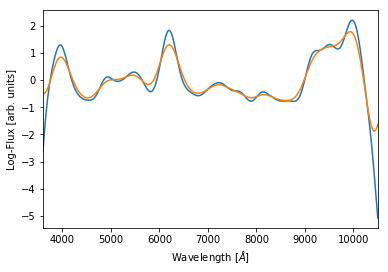

In [23]:
import numpy as np
from astropy.modeling import models
import astropy.units as u
from specutils import Spectrum1D, SpectralRegion
from specutils.fitting import find_lines_derivative
from specutils.fitting import fit_generic_continuum
from astropy.convolution import convolve, Gaussian1DKernel
x=np.linspace(3600,10500,443)

zero_spectrum=X[0,:]
plt.plot(x,zero_spectrum)
plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel('Log-Flux [arb. units]')
#plt.title(param)
plt.xlim([3600,10500])
#plt.savefig('spectrum.png')
plt.grid()
#Gaussian Smooth

gauss_smooth = Gaussian1DKernel(8)

z_spectrum=convolve(zero_spectrum, gauss_smooth)
#print(zero_spectrum)


spectrum = Spectrum1D(flux=z_spectrum*u.Jy, spectral_axis=x*u.AA)
#print(spectrum)

lines = find_lines_derivative(spectrum, flux_threshold=0.75)

#o=lines[lines['line_type'] == 'emission']
print(lines)
plt.plot(spectrum.spectral_axis, spectrum.flux)
plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel('Log-Flux [arb. units]')
#plt.title(param)
plt.xlim([3600,10500])
#plt.savefig('spectrum.png')
plt.grid()


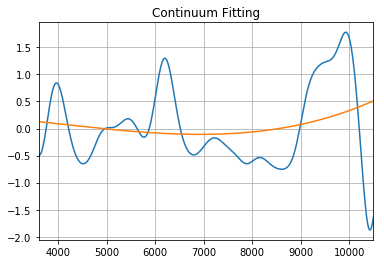

In [24]:
g1_fit = fit_generic_continuum(spectrum)

y_continuum_fitted = g1_fit(x*u.AA)

plt.plot(spectrum.spectral_axis, spectrum.flux)
plt.plot(spectrum.spectral_axis, y_continuum_fitted)
plt.title('Continuum Fitting')
plt.xlim([3600,10500])
plt.grid(True)

Spectrum1D (length=443)
flux:             [ -3.9188, ..., -3.204 ],  mean=-0.65009
spectral axis:    [ 3600.0 Angstrom, ..., 1.05e+04 Angstrom ],  mean=7050.0 Angstrom


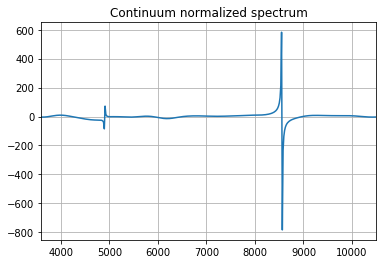

In [25]:
spec_normalized = spectrum / y_continuum_fitted
print(spec_normalized)

plt.plot(spec_normalized.spectral_axis, spec_normalized.flux)
plt.title('Continuum normalized spectrum')
plt.xlim([3600,10500])
plt.grid('on')

(443,)


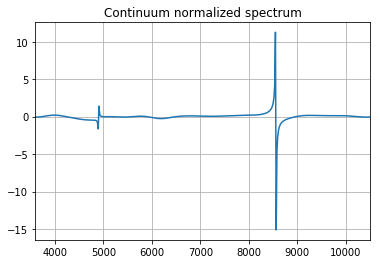

In [26]:
spstd=True#False
#spstd=False

X=spec_normalized.flux# np.asarray(spec_normalized.flux)#spectra_.values#.replace(-np.inf,0)
print(X.shape)
if(spstd==True):
    mean_flx= np.ma.average(X[:443])
    ll=(X[:443]-mean_flx.reshape(-1,1))**2
    aveflux=np.ma.average(ll)
    sflux = np.sqrt(aveflux)
    X = (X[:443]-mean_flx.reshape(-1,1))/sflux.reshape(-1,1) 
    

plt.plot(x,X[0])
plt.title('Continuum normalized spectrum')
plt.xlim([3600,10500])
plt.grid('on')

In [27]:
x=np.linspace(3600,10500,443)
spectrum = Spectrum1D(flux=X[0]*u.Jy, spectral_axis=x*u.AA)
lines = find_lines_derivative(spectrum, flux_threshold=0.75)
print(lines[lines['line_type']=='emission'])


   line_center    line_type line_center_index
     Angstrom                                
----------------- --------- -----------------
4911.312217194571  emission                84
8533.031674208145  emission               316


In [ ]:

# Reading data from data_dr12.fits. This file had the spectra from data dr12. 
hdul_2 = fits.open('data_dr12.fits') # Open file
info=hdul_2.info() # File info 
columns=hdul_2[1].columns # File Columns 
print(hdul,'/n',columns)
data2=hdul_2[1].data # Database of spectra
spectra=hdul_2[0].data # Spectrum of each object 
#X=spectra
#mean_flx= np.ma.average(X[:,:443],axis=1)
##ll=(X[:,:443]-mean_flx.reshape(-1,1))**2
##aveflux=np.ma.average(ll, axis=1)
#sflux = np.sqrt(aveflux)
#X = (X[:,:443]-mean_flx.reshape(-1,1))/sflux.reshape(-1,1) 
#spectra=X


# The Spectra in this database have three main parameters: Plate ID, The modified julian day and fiber ID of the observation.
# Let's take a look of the first spectrum.
x=np.linspace(360,1050,443) # I cut the sample to 443 pixels in spaced log-wavelength.  
#x=np.linspace(0,886,886)
#zero_spectrum=spectra[12030] #First spectrum
#zero_spectrum=zero_spectrum[:443]

PLATE=data2['PLATE'] # Spectra's Plate ID
MJD=data2['MJD'] # Spectra's the modified juliam day
FIBERID=data2['FIBERID'] # Spectra's fiber ID

index=[ind_star[0],ind_galaxy[8],ind_qso[7],ind_qso_bal[0]]
print(index)
n=0
for i in index:
    sp=spectra[i]
    
    mean_flx= np.ma.average(sp[:443])
    ll=(sp[:443]-mean_flx.reshape(-1,1))**2
    aveflux=np.ma.average(ll)
    sflux = np.sqrt(aveflux)
    sp = (sp[:443]-mean_flx.reshape(-1,1))/sflux.reshape(-1,1)
    
    plate=PLATE[i]
    mjd=MJD[i]
    fiberid=FIBERID[i] 
    tar=obj.loc[i]
    param = 'Plate = {:.2f}, mjd = {:.2f}, fiberid={:.2f}\n Z={:.2f}'.format(plate, mjd, fiberid,tar[1])
    plt.plot(x,sp[0,:443])#np.log(abs(sp[:443])))
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Log-Flux [arb. units]')
    plt.title(param)
    plt.xlim([360,1050])
    plt.grid()
    sav='spectro_{:.2f}.png'.format(n)
    plt.savefig(sav)
    n+=1
    plt.show()

    print(tar[1])
    
#buscar aqui los objetos de QuasarNET


In [ ]:
print(y)

In [ ]:
######################__________________Report 05__________________######################

# my first Neural Network. SpectraNET :}

import torch 
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.autograd import Variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)



In [ ]:
import torch.utils.data

train_data = []
for i in range(y_train.shape[0]):
    xt=X_train[i,:].reshape(1,-1)
    train_data.append([Variable(torch.tensor(xt, dtype=torch.float)), torch.tensor(y_train[i], dtype=torch.long)])
    
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)
i1, l1 = next(iter(train_loader))
print(i1.shape,l1.shape)


In [ ]:
test_data = []
for i in range(y_test.shape[0]):
    xtst=X_test[i,:].reshape(1,-1)
    test_data.append([Variable(torch.tensor(xtst, dtype=torch.float)), torch.tensor(y_test[i], dtype=torch.long)])
    
test_loader = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=batch_size)
i1, l1 = next(iter(test_loader))
print(i1.shape,l1.shape)

In [ ]:
"""
test_data = []
for i in range(y_test.shape[0]):
    xtst=X_test[i,:].reshape(1,-1)
    test_data.append([Variable(torch.tensor(xtst, dtype=torch.float)), torch.tensor(y_test[i], dtype=torch.long)])
    
test_loader = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=batch_size)
i1, l1 = next(iter(test_loader))
print(i1.shape,l1.shape)
"""


In [ ]:

def Load_Files(file_1,file_2,N_sample=20000,classification=True):
    hdul = fits.open(file_1) # Open file 1 -- 'truth_DR12Q.fits'
    info=hdul.info() # File info
    columns=hdul[1].columns # File Columns 
    print(info,'/n',columns)
    data=hdul[1].data # Database of spectra with human-expert classifications 

    # Reading data from data_dr12.fits. This file had the spectra from data dr12. 
    hdul_2 = fits.open(file_2) # Open file 2 -- 'data_dr12.fits'
    info=hdul_2.info() # File info 
    columns=hdul_2[1].columns # File Columns
    print(hdul,'/n',columns)
    data2=hdul_2[1].data # Database of spectra
    spectra=hdul_2[0].data # Spectrum of each object 
    
    # Subset of PLATE parameters of both data
    data_PLATE_1=data['PLATE']
    data_PLATE_2=data2['PLATE']

    # Subset of MJD parameters of both data
    data_MJD_1=data['MJD']
    data_MJD_2=data2['MJD']

    # Subset of FIBERID parameters of both data
    data_FIBERID_1=data['FIBERID']
    data_FIBERID_2=data2['FIBERID']
    
    # The column 'CLASS_PERSON' have a class identifier for each spectrum: STARS=1, GALAXY=4, QSO=3 and QSO_BAL=30.
    C_P=data['CLASS_PERSON'] #Class Person column 
    STAR=C_P[C_P==1] # objects classified as stars
    GALAXY=C_P[C_P==4] # objects classified as galaxies 
    QSO=C_P[C_P==3] # objects classified as QSO (Quasars)
    QSO_BAL=C_P[C_P==30] # objects classified as QSO BAL (Quasars with Broad Absortions Lines)
    N_C=C_P[C_P!=30]   
    N_C=N_C[N_C!=3]
    N_C=N_C[N_C!=1]
    N_C=N_C[N_C!=4] # objects wrong classified
    print('Star:',STAR.shape)
    print('Galaxy:',GALAXY.shape)
    print('QSO:',QSO.shape)
    print('QSO BAL:',QSO_BAL.shape)
    print('NN:',N_C.shape)
    
    # I create two DataFrame for Superset_DR12Q and data_dr12 with only three parameters
    data1={'PLATE':data_PLATE_1,'MJD':data_MJD_1,'FIBERID':data_FIBERID_1,'ID':data_ID_1}
    data1=pd.DataFrame(data=data1)

    data2={'PLATE':data_PLATE_2,'MJD':data_MJD_2,'FIBERID':data_FIBERID_2,'ID':data_ID_2}
    data2=pd.DataFrame(data=data2)

    # I convert all objects in both set to string chain in orden to combine them as one new ID.
    data1['PLATE']=data1['PLATE'].astype(str)
    data1['MJD']=data1['MJD'].astype(str)
    data1['FIBERID']=data1['FIBERID'].astype(str)
    data1['PM'] = data1['MJD'].str.cat(data1['FIBERID'],sep="-")
    data1['NEWID'] = data1['PLATE'].str.cat(data1['PM'],sep="-")
    data_1=data1.drop(columns=['PLATE','MJD','FIBERID','ID','PM']).values

    data2['PLATE']=data2['PLATE'].astype(str)
    data2['MJD']=data2['MJD'].astype(str)
    data2['FIBERID']=data2['FIBERID'].astype(str)
    data2['PM'] = data2['MJD'].str.cat(data2['FIBERID'],sep="-")
    data2['NEWID'] = data2['PLATE'].str.cat(data2['PM'],sep="-")
    data_2=data2.drop(columns=['PLATE','MJD','FIBERID','ID','PM']).values # New set of database 2 with new ID's
    print(data_2.shape)

    # With the routine of numpy intersect1d, I find the intersections elements in both sets. This elements  
    data_CO=np.array(np.intersect1d(data_1,data_2,return_indices=True))

    data_CO_objects=data_CO[0] # The unique new ID of each element in both sets
    data_CO_ind1=data_CO[1] # Indices of intersected elements from the original data 1 (Superset_DR12Q.fits) 
    data_CO_ind2=data_CO[2] # Indices of intersected elements form the original data 2 (data_dr12.fits)
    print('I find',len(data_CO_objects),'objects with spectra from DR12')
    print(data_CO_ind1,data_CO_ind2)
    indi={'ind1':data_CO_ind1,'ind2':data_CO_ind2}
    ind=pd.DataFrame(data=indi,index=data_CO_ind1)

    cp=np.array(data['CLASS_PERSON'],dtype=float)
    z=np.array(data['Z_VI'],dtype=float)
    zc=np.array(data['Z_CONF_PERSON'],dtype=float)
    bal=np.array(data['BAL_FLAG_VI'],dtype=float)
    bi=np.array(data['BI_CIV'],dtype=float)

    d={'CLASS_PERSON':cp,'Z_VI':z,'Z_CONF_PERSON':zc,'BAL_FLAG_VI':bal,'BI_CIV':bi}
    data_0=pd.DataFrame(data=d)#.values #super database
    obj=data_0.loc[data_CO_ind1]

    print(obj.shape)
    # Sample of objects. I chosen 2500 object per class. 
    stars=obj.loc[obj['CLASS_PERSON']==1]
    galaxies=obj.loc[obj['CLASS_PERSON']==4]
    qsos=obj.loc[obj['CLASS_PERSON']==3]
    qsos_bal=obj.loc[obj['CLASS_PERSON']==30]

    sample_star=stars.sample(n=int(N_sample/4),weights='CLASS_PERSON', random_state=5)
    sample_galaxy=galaxies.sample(n=int(N_sample/4),weights='CLASS_PERSON', random_state=5)
    sample_qso=qsos.sample(n=int(N_sample/4),weights='CLASS_PERSON', random_state=5)
    sample_qso_bal=qsos_bal.sample(n=int(N_sample/4),weights='CLASS_PERSON', random_state=5)

    sample_objects=pd.concat([sample_star,sample_galaxy,sample_qso,sample_qso_bal])

    ind_star=np.array(sample_star.index)
    ind_galaxy=np.array(sample_galaxy.index)
    ind_qso=np.array(sample_qso.index)
    ind_qso_bal=np.array(sample_qso_bal.index)

    indi=np.concatenate((ind_star, ind_galaxy,ind_qso,ind_qso_bal), axis=None)
    indi1=ind.loc[indi].values
    #print(indi)

    spectra_=np.zeros((N_sample,443))
    j=0
    for i in indi:
        k=indi1[j,1]
        spectra_[j,:]=np.log(abs(spectra[k,:443]))
        j=j+1    
    spectra_=pd.DataFrame(spectra_)
    X=spectra_.replace(-np.inf,0)


    X=X.values # Spectra
    
    if(classification!=True):
        y=sample_objects['Z_VI']
        y=np.array(y,dtype=float)
        return X,y
    else:  
        y=sample_objects['CLASS_PERSON']
        y=y.replace([1, 4, 3, 30], [0,1,2,3]).values
        y=np.array(y,dtype=float)
        return X,y

In [ ]:
def Loader(X,y,N_sample=20000,epoc=10):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    batch_size=int(N_sample/epoc)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
    train_data = []
    for i in range(y_train.shape[0]):
        xt=X_train[i,:].reshape(1,-1)
        train_data.append([Variable(torch.tensor([xt], dtype=torch.float)), y_train[i]])
    
    train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)

    test_data = []
    for i in range(y_test.shape[0]):
        xtst=X_test[i,:].reshape(1,-1)
        test_data.append([Variable(torch.tensor([xtst], dtype=torch.float)), y_test[i]])
    
    test_loader = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=batch_size)
    
    val_data = []
    for i in range(y_val.shape[0]):
        xv=X_val[i,:].reshape(1,-1)
        val_data.append([Variable(torch.tensor([xv], dtype=torch.float)), y_val[i]])
    
    val_loader = torch.utils.data.DataLoader(val_data, shuffle=True, batch_size=batch_size)
    return train_loader,test_loader,val_loader

In [ ]:
X,y=Load_Files('truth_DR12Q.fits','data_dr12.fits',N_sample=20000,classification=True)
train_loader,test_loader,val_loader=Loader(X,y,N_sample=20000,epoc=10)

In [ ]:
# CNN for classification
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import precision_recall_fscore_support

learning_rate=0.01
log_interval=10

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(1, 100, 10,stride=2)
        self.conv2 = nn.Conv1d(100, 100, 10,stride=2)
        self.conv3 = nn.Conv1d(100, 100, 10,stride=2)
        self.conv4 = nn.Conv1d(100, 100, 10,stride=2)
        self.pool = nn.MaxPool1d(2, 1)
        self.fc1 = nn.Linear(1800, 16)
        #self.fc1 = nn.Linear(10300, 16)
        self.fc2 = nn.Linear(16, 4)


    def forward(self, x):
        in_size = x.size(0)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(in_size, -1)
        x = F.relu(self.fc1(x))        
        x = self.fc2(x)
        #print(x.shape)
        return F.log_softmax(x)
    
net = Net()
print(net)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

def train(epoch):
    #model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader,0):
        data, target = Variable(data), Variable(target)
        #print(data.shape,target.shape)
        #images=data[batch_idx,0]
        #plt.imshow(images)
        #plt.show()
        
        optimizer.zero_grad()
        
        output = net(data)
        #print(output,'target',target)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        print(batch_idx,running_loss)
        #if(batch_idx !=0):    # print every 2000 mini-batches
            #print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 1000))
            #running_loss = 0.0
    

print('Finished Training')
        
for i in range(epoc):
    train(i)



In [ ]:
correct = 0
total = 0
d=[]
d1=[]
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        #print(predicted,predicted.shape)
        d.append(predicted)
        d1.append(labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        

print('Accuracy of the network on the 5000 test images: %d %%' % (100 * correct / total))
#d=np.asarray(d)
print(d[0].shape)
print(d1[0].shape)
y_pred=torch.cat((d[0],d[1]),0)
y_test=torch.cat((d1[0],d1[1]),0)
print(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

class_names=['Star','Galaxy','QSO','QSO_BAL']

def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.subplots(121)
#y_test=y_test.detach().numpy()
#y_pred=y_pred.detach().numpy()
#print(y_pred)
plot_confusion_matrix(y_test, y_test, classes=class_names, title='Confusion matrix')
plt.savefig('cm_train.png')
#plt.subplots(122)
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix')
plt.savefig('cm_test.png')

from sklearn.metrics import precision_recall_curve
prf=precision_recall_fscore_support(y_test, y_pred, average=None)#,labels=['Star','Galaxy','QSO','QSO_BAL'])

print(prf)

In [ ]:
classes = ('Star', 'Galaxy', 'QSO', 'QSO_BAL')
class_correct = list(0. for i in range(4))
class_total = list(0. for i in range(4))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(4):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))